<a href="https://colab.research.google.com/github/AliRafieePour/Artificial-Intelligence-Assignments-/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

s = seed(1)
tf.random.set_seed(s)

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Using TensorFlow backend.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13556218931548754785, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10262980639716635047
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10412007695686776677
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13252739395569659663
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def preprocess(name):
  file = pd.read_csv(name)
  dataset = file.values
  dataset = np.array([[float(dataset[i][j]) for j in range(len(dataset[0]))] for i in range(len(dataset))])
  Y = dataset[:, -1]
  Y = keras.utils.to_categorical(Y, 2)
  X = dataset[:, :-1]
  min_max_scaler = preprocessing.MinMaxScaler()
  X_scale = min_max_scaler.fit_transform(X)
  X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.4)
  X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
  return X_train, Y_train, X_val, X_test, Y_val, Y_test

In [0]:

def makeModel(numLayers, formNorons, shape, numCategories = 2):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(formNorons[0], input_shape=shape))
  model.add(tf.keras.layers.Activation('relu'))
  #model.add(tf.keras.layers.Dropout(0.3))
  for i in range(1, numLayers):
    model.add(tf.keras.layers.Dense(formNorons[i]))
    model.add(tf.keras.layers.Activation('relu'))
  #model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Dense(numCategories))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [0]:
def cmpile(model, opt, los, mtrics):
  model.compile(optimizer=opt,
              loss=los,
              metrics=mtrics)
  return model

In [0]:
def train_and_validate(model, X_train, Y_train, X_val, Y_val, bs_tr, ep):
  hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size = bs_tr, epochs = ep)
  return hist, model

In [0]:
def plot(hist, hist2):
  plt.plot(hist.history['accuracy'], color='red')
  plt.plot(hist2.history['accuracy'], color='green')

In [9]:
X_train, Y_train, X_val, X_test, Y_val, Y_test = preprocess('heart-disease.csv')
his = []
for i in [100, 150, 200, 250,300,350,400,450,500,550]:
  model = makeModel(2, [10, 10], (13,), 2)
  model = cmpile(model, 'adam', 'binary_crossentropy', 'accuracy')
  history, model = train_and_validate(model, X_train, Y_train, X_val, Y_val, 181, i)
  his.append([history, model])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step - loss: 0.6210 - accuracy: 0.7348 - val_loss: 0.6250 - val_accuracy: 0.6721
Epoch 52/300
1/1 [==============================] - 0s 28ms/step - loss: 0.6195 - accuracy: 0.7348 - val_loss: 0.6236 - val_accuracy: 0.6721
Epoch 53/300
1/1 [==============================] - 0s 33ms/step - loss: 0.6179 - accuracy: 0.7348 - val_loss: 0.6222 - val_accuracy: 0.6721
Epoch 54/300
1/1 [==============================] - 0s 29ms/step - loss: 0.6163 - accuracy: 0.7403 - val_loss: 0.6208 - val_accuracy: 0.6721
Epoch 55/300
1/1 [==============================] - 0s 36ms/step - loss: 0.6146 - accuracy: 0.7348 - val_loss: 0.6194 - val_accuracy: 0.6885
Epoch 56/300
1/1 [==============================] - 0s 29ms/step - loss: 0.6130 - accuracy: 0.7403 - val_loss: 0.6180 - val_accuracy: 0.7049
Epoch 57/300
1/1 [==============================] - 0s 29ms/step - loss: 0.6113 - accuracy: 0.7403 - val_loss: 0.616

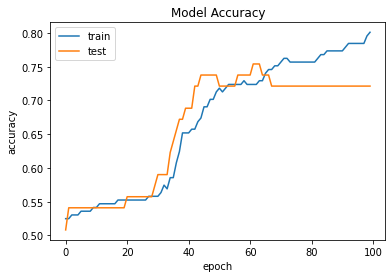

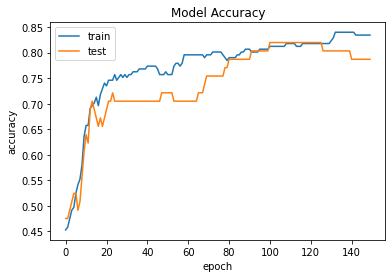

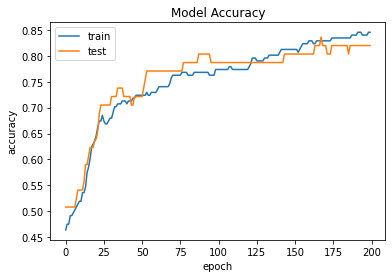

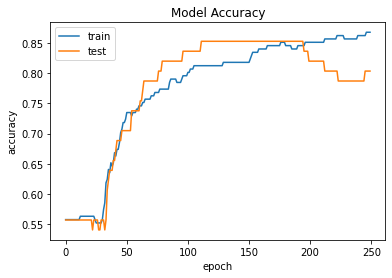

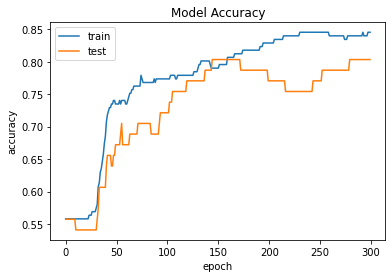

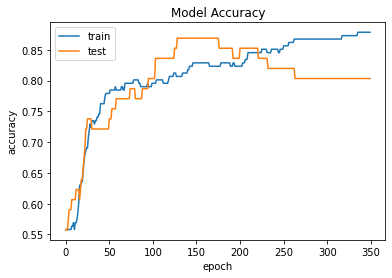

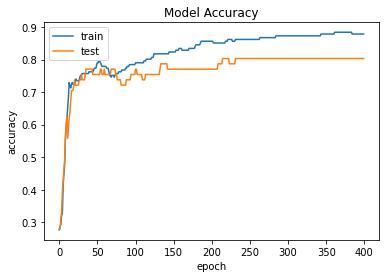

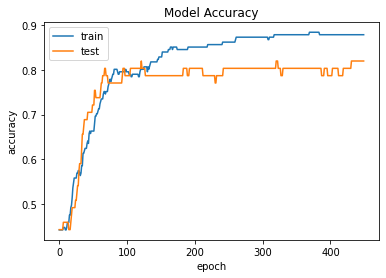

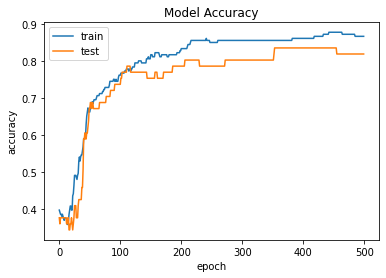

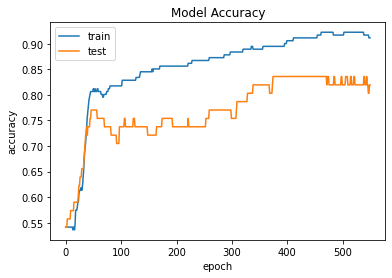

In [22]:
for i in his:
  plt.plot(i[0].history['loss'])
  plt.plot(i[0].history['val_loss'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

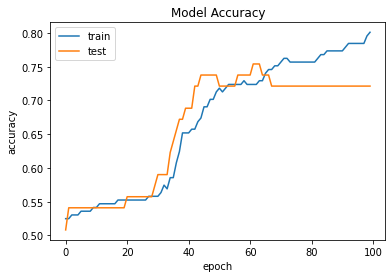

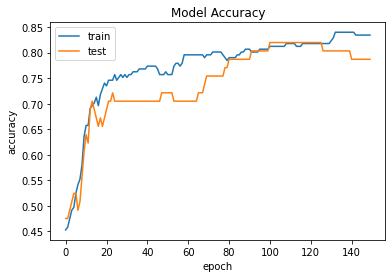

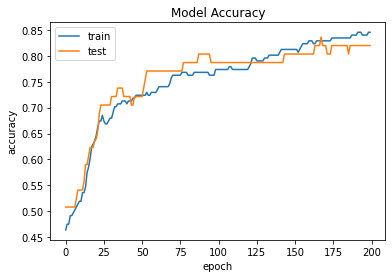

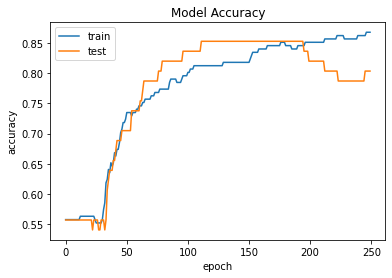

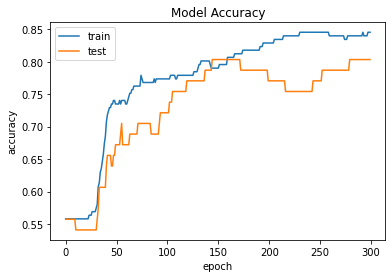

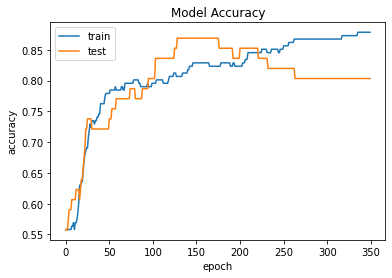

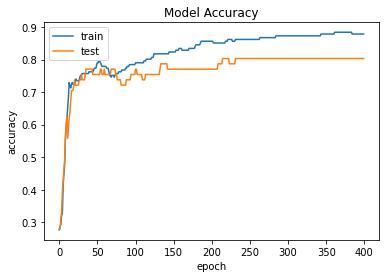

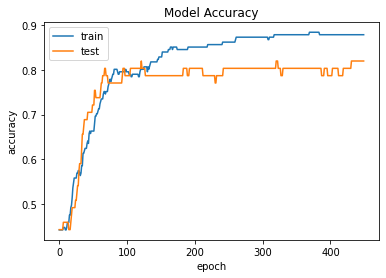

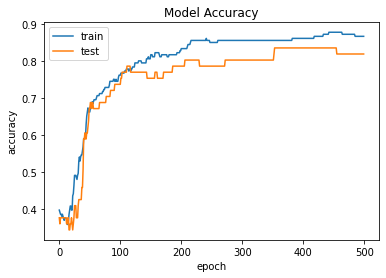

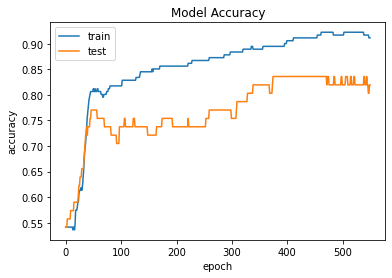

In [23]:
for i in his:
  plt.plot(i[0].history['accuracy'])
  plt.plot(i[0].history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [24]:
X_train, Y_train, X_val, X_test, Y_val, Y_test = preprocess('heart-disease.csv')
his = []
for i in [[5, 5], [10, 5], [10,10], [15, 10], [15, 15]]:
  model = makeModel(len(i), i, (13,), 2)
  model = cmpile(model, 'adam', 'binary_crossentropy', 'accuracy')
  history, model = train_and_validate(model, X_train, Y_train, X_val, Y_val, 181, 500)
  his.append([history, model])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 112ms/step - loss: 0.6821 - accuracy: 0.4641 - val_loss: 0.6807 - val_accuracy: 0.4426
Epoch 2/500
1/1 [==============================] - 0s 30ms/step - loss: 0.6810 - accuracy: 0.4696 - val_loss: 0.6794 - val_accuracy: 0.4590
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.6800 - accuracy: 0.4917 - val_loss: 0.6782 - val_accuracy: 0.4590
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6789 - accuracy: 0.4917 - val_loss: 0.6770 - val_accuracy: 0.4590
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6779 - accuracy: 0.5028 - val_loss: 0.6759 - val_accuracy: 0.4590
Epoch 6/500
1/1 [==============================] - 0s 33ms/step - loss: 0.6769 - accuracy: 0.5083 - val_loss: 0.6747 - val_accuracy: 0.4590
Epoch 7/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6760 - accuracy: 0.5193 - val_loss: 0.6736 - v

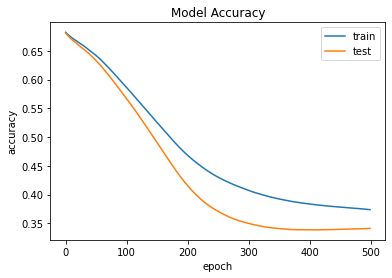

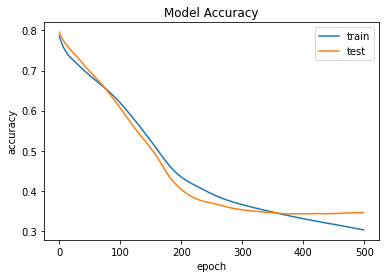

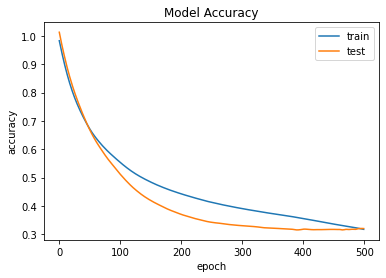

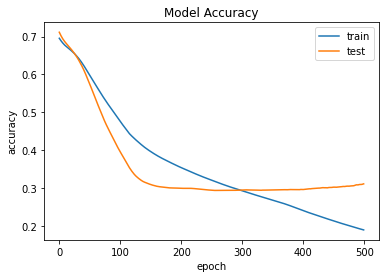

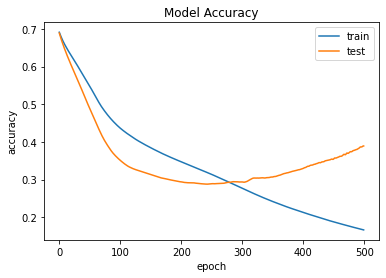

In [25]:
for i in his:
  plt.plot(i[0].history['loss'])
  plt.plot(i[0].history['val_loss'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

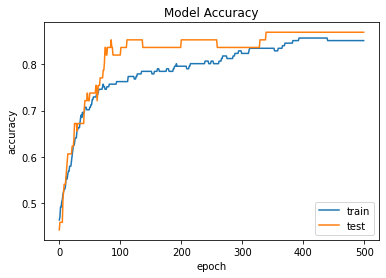

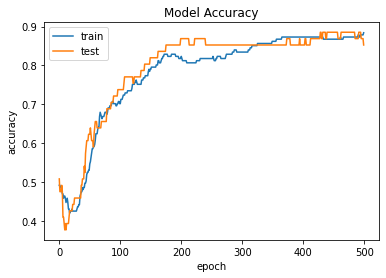

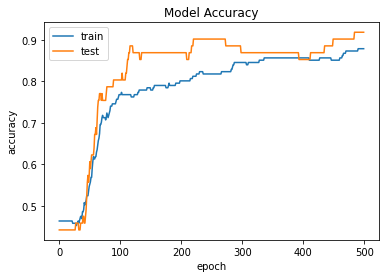

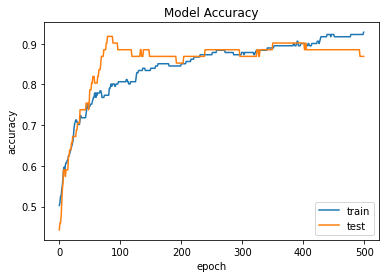

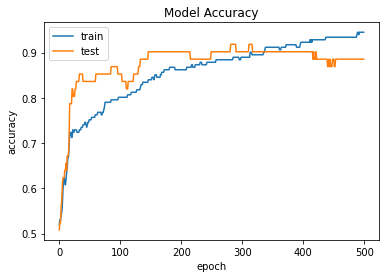

In [26]:
for i in his:
  plt.plot(i[0].history['accuracy'])
  plt.plot(i[0].history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [29]:
X_train, Y_train, X_val, X_test, Y_val, Y_test = preprocess('heart-disease.csv')
his = []
for i in [5, 10, 30, 50, 70,90,110,130,150,170]:
  model = makeModel(2, [10, 10], (13,), 2)
  model = cmpile(model, 'adam', 'binary_crossentropy', 'accuracy')
  history, model = train_and_validate(model, X_train, Y_train, X_val, Y_val, i, 500)
  his.append([history, model])

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 37ms/step - loss: 0.7133 - accuracy: 0.5635 - val_loss: 0.7025 - val_accuracy: 0.5902
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 0.7073 - accuracy: 0.5635 - val_loss: 0.6994 - val_accuracy: 0.5902
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 0.7042 - accuracy: 0.5635 - val_loss: 0.6963 - val_accuracy: 0.5902
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 0.7014 - accuracy: 0.5691 - val_loss: 0.6934 - val_accuracy: 0.5902
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6989 - accuracy: 0.5691 - val_loss: 0.6906 - val_accuracy: 0.5902
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6960 - accuracy: 0.5691 - val_loss: 0.6878 - val_accuracy: 0.5902
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5691 - val_loss: 0.6851 - va

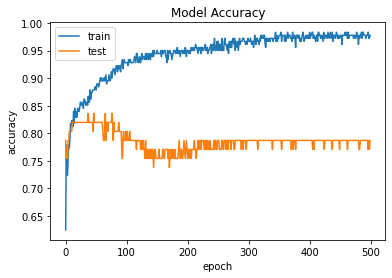

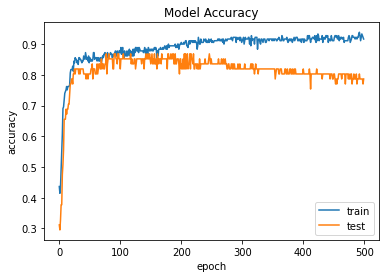

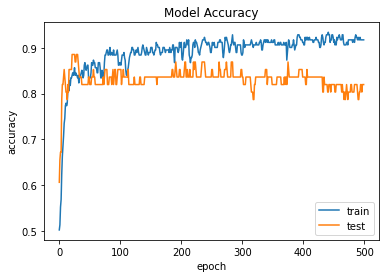

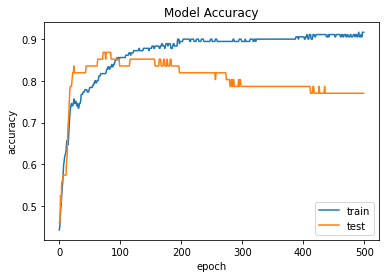

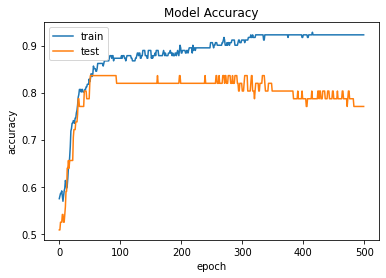

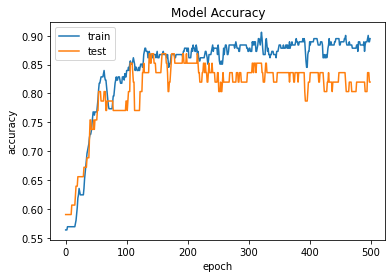

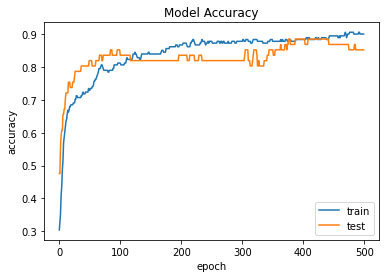

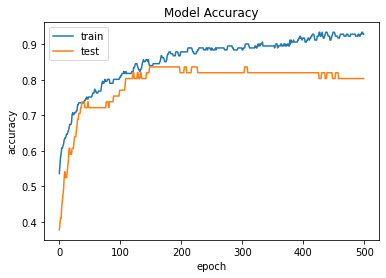

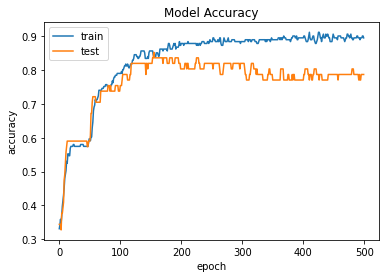

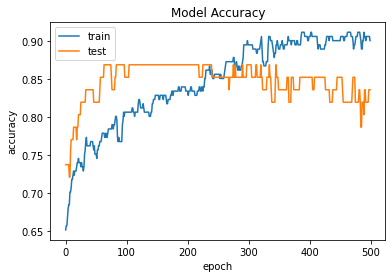

In [30]:
for i in his:
  plt.plot(i[0].history['accuracy'])
  plt.plot(i[0].history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

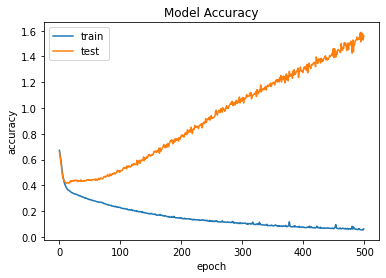

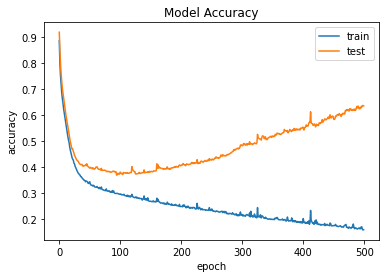

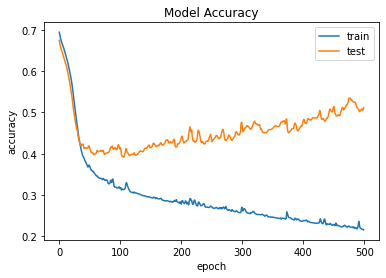

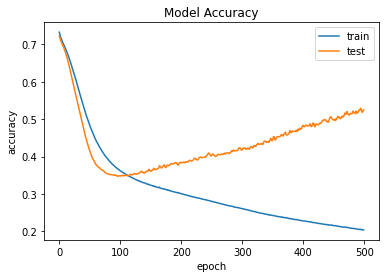

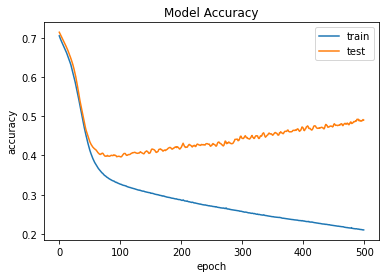

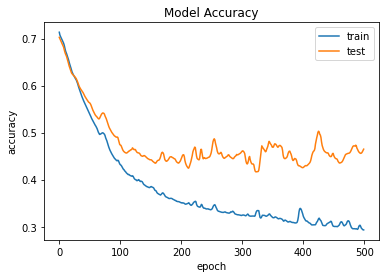

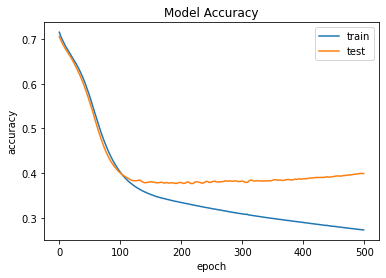

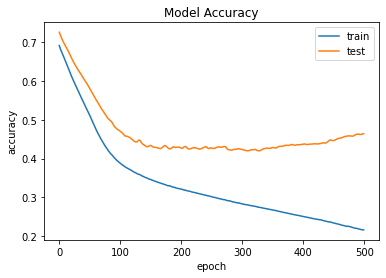

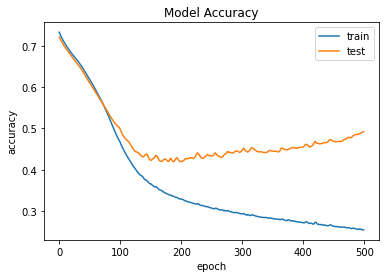

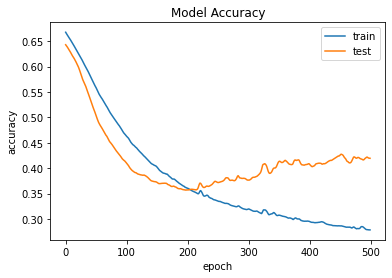

In [31]:
for i in his:
  plt.plot(i[0].history['loss'])
  plt.plot(i[0].history['val_loss'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [35]:
X_train, Y_train, X_val, X_test, Y_val, Y_test = preprocess('heart-disease.csv')
model = makeModel(2, [10, 10], (13,), 2)
model = cmpile(model, 'adam', 'binary_crossentropy', 'accuracy')
history, model = train_and_validate(model, X_train, Y_train, X_val, Y_val, 110, 200)


Epoch 1/200
2/2 [==============================] - 0s 165ms/step - loss: 0.7398 - accuracy: 0.3702 - val_loss: 0.7693 - val_accuracy: 0.2131
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 0.7360 - accuracy: 0.3646 - val_loss: 0.7646 - val_accuracy: 0.2131
Epoch 3/200
2/2 [==============================] - 0s 14ms/step - loss: 0.7320 - accuracy: 0.3591 - val_loss: 0.7600 - val_accuracy: 0.2131
Epoch 4/200
2/2 [==============================] - 0s 14ms/step - loss: 0.7286 - accuracy: 0.3646 - val_loss: 0.7555 - val_accuracy: 0.2131
Epoch 5/200
2/2 [==============================] - 0s 14ms/step - loss: 0.7254 - accuracy: 0.3757 - val_loss: 0.7511 - val_accuracy: 0.2131
Epoch 6/200
2/2 [==============================] - 0s 14ms/step - loss: 0.7220 - accuracy: 0.3702 - val_loss: 0.7469 - val_accuracy: 0.2131
Epoch 7/200
2/2 [==============================] - 0s 14ms/step - loss: 0.7189 - accuracy: 0.3702 - val_loss: 0.7427 - val_accuracy: 0.2131
Epoch 8/200
2/2 [==

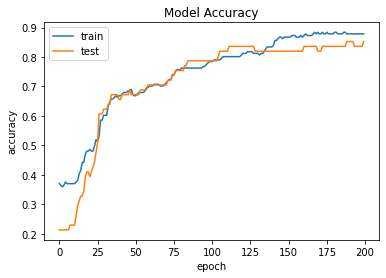

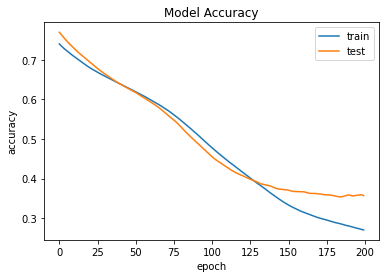

In [37]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()